---

## Modeling


### Decision Tree Classifier

<div class="alert alert-warning">
    <strong>Based on boxplots earlier, we determined which variable is most suitable to use inside our decision tree classifier.<br>
We chose the variables based on the spread on the boxplot to see which one has the most difference between the outcome.<br>
We chose Glucose, Age, BloodPressure and BMI.</strong>

</div>


We have chosen to model our data using the basic decision tree to allow us to be able to know whether the data we have clean can give us a good result.

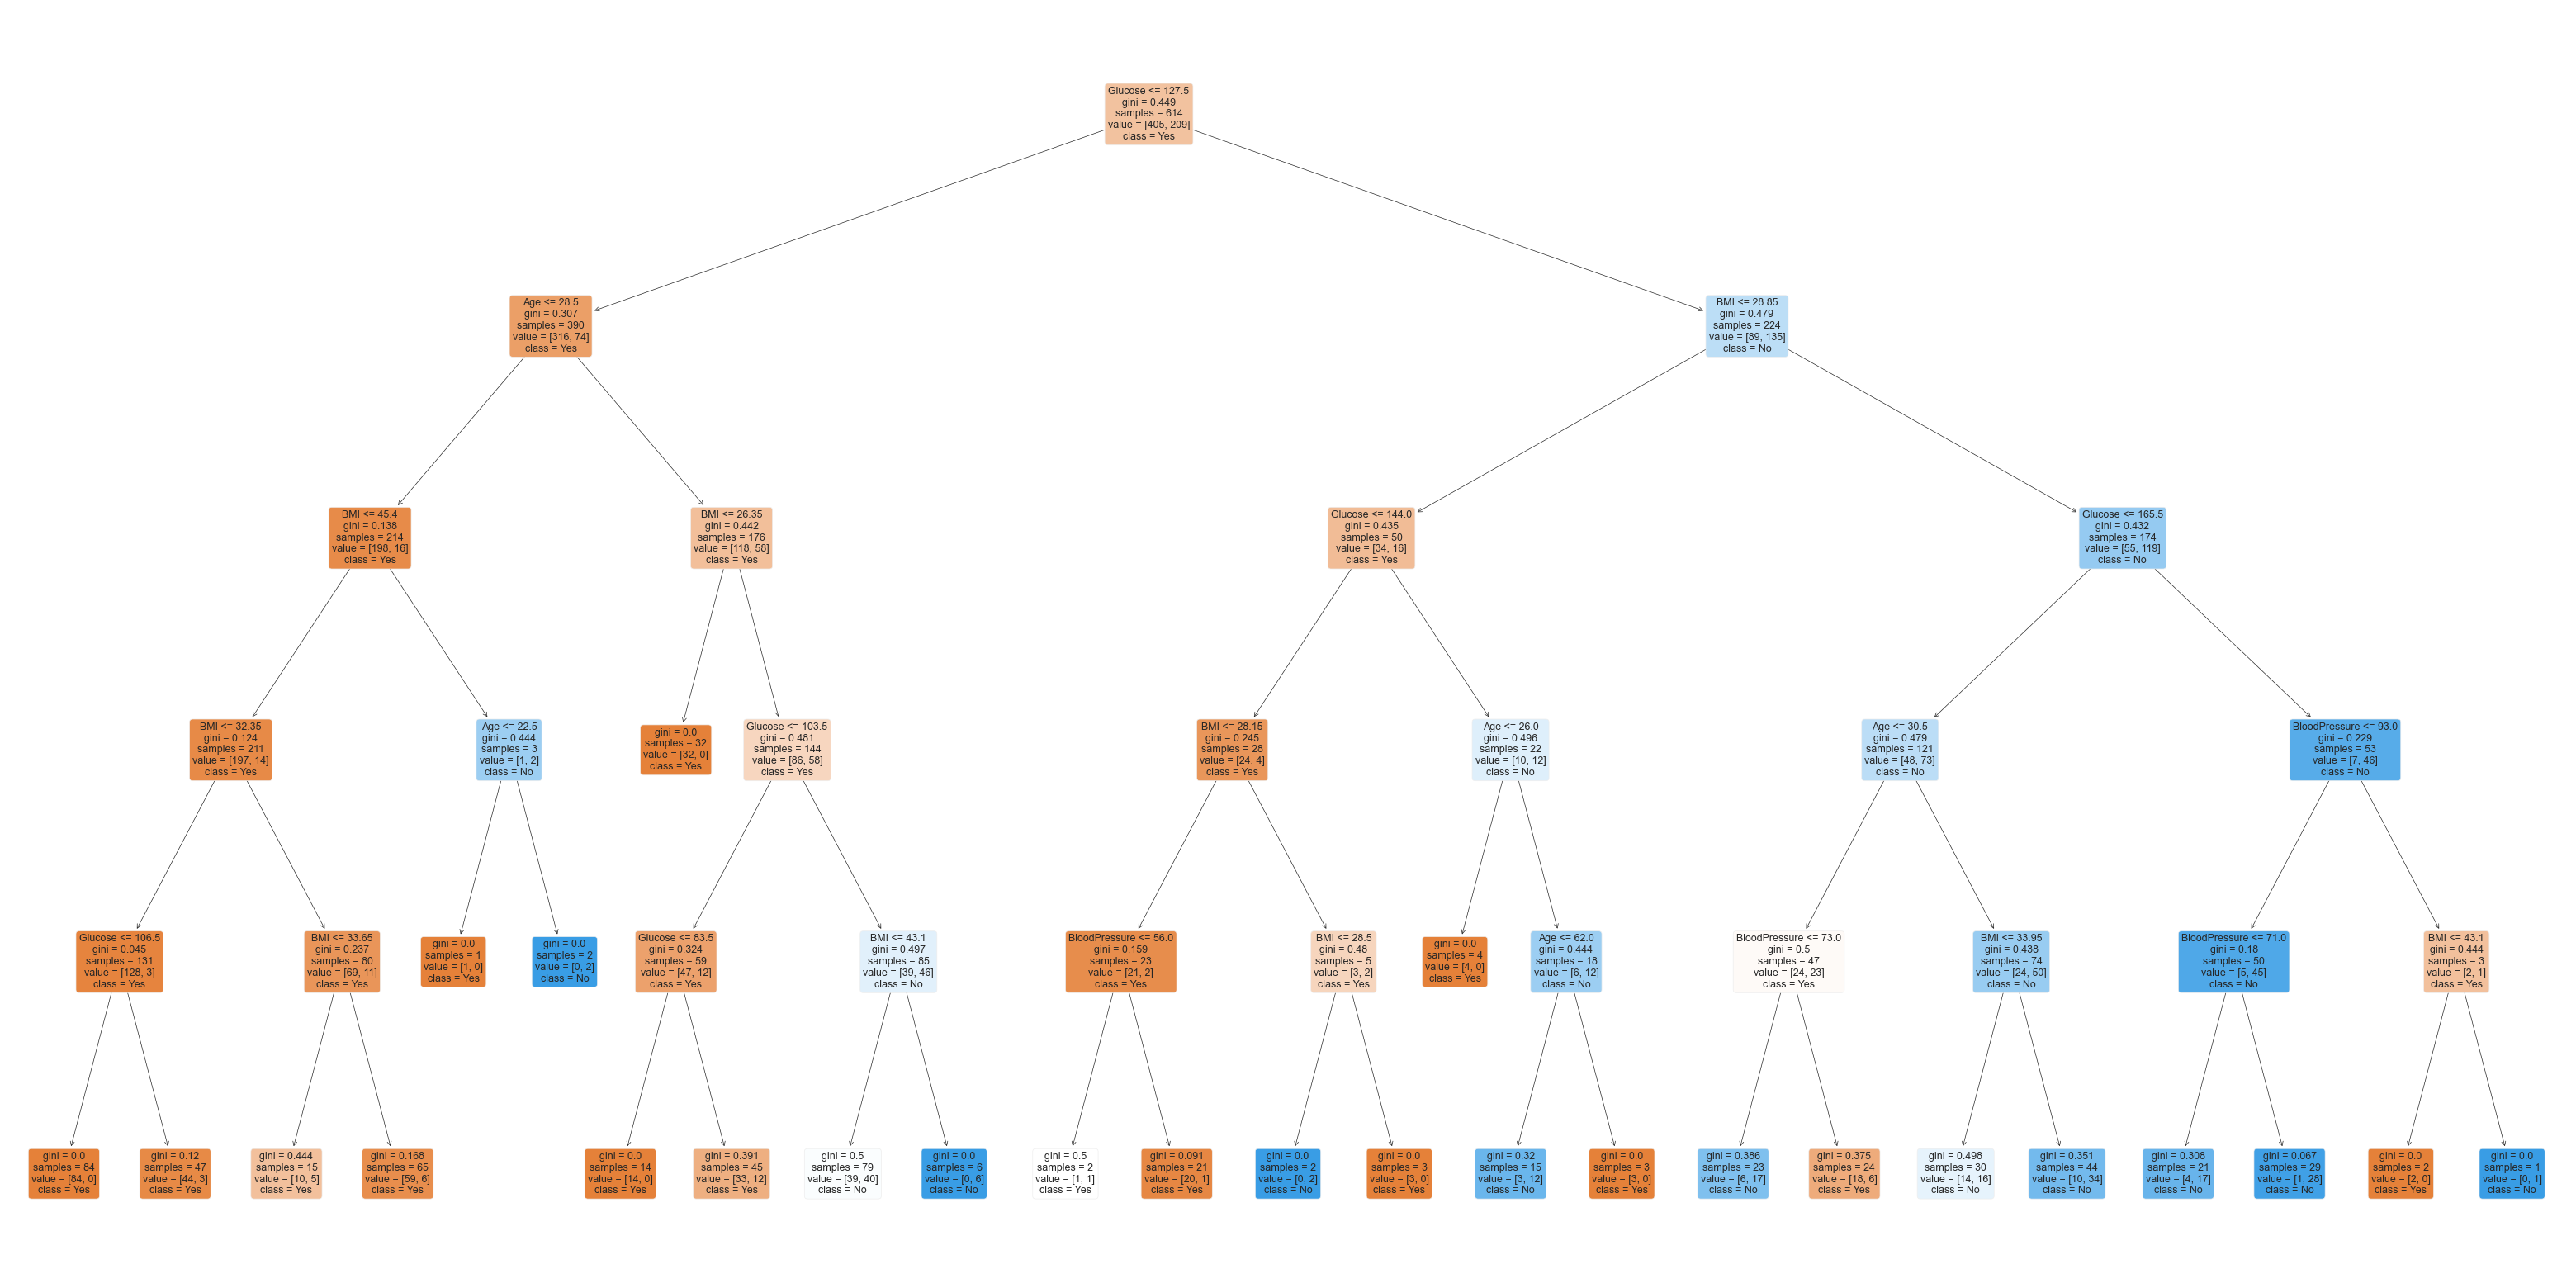

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

desdataDF = pd.DataFrame(data[["Glucose", "BMI", "BloodPressure", "Age"]])
outcomeDF = pd.DataFrame(data["Outcome"])
desdataTrain, desdataTest, outcomeTrain, outcomeTest = train_test_split(desdataDF, outcomeDF, test_size = 0.20)
dectree4 = DecisionTreeClassifier(max_depth = 5)
dectree4.fit(desdataTrain, outcomeTrain)

f = plt.figure(figsize=(40,20))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=desdataTrain.columns, 
          class_names=["Yes","No"])
plt.show()

Train data: 	
Classification Accuracy 	: 0.8192182410423453
TN: 328
FN: 34
TP: 175
FP: 77
True Positive Rate:  0.8373205741626795
False Positive Rate:  0.19012345679012346


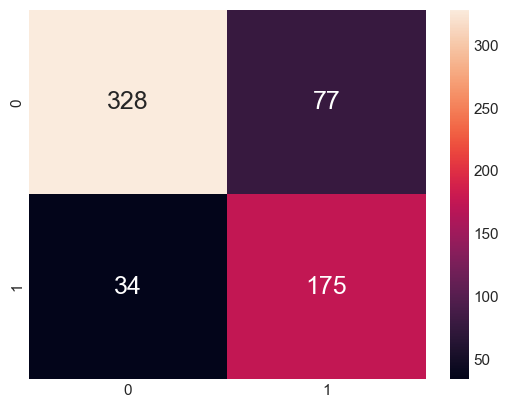

In [19]:
#Confusion Matrix
outcome_train_pred = dectree4.predict(desdataTrain)
sb.heatmap(confusion_matrix(outcomeTrain, outcome_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Train data: \t")
print("Classification Accuracy \t:", dectree4.score(desdataTrain, outcomeTrain))
TrainInfo = confusion_matrix(outcomeTrain, outcome_train_pred)
TN = TrainInfo[0][0]
FN = TrainInfo[1][0]
TP = TrainInfo[1][1]
FP = TrainInfo[0][1]

print("TN:",TN)
print("FN:",FN)
print("TP:",TP)
print("FP:",FP)
print("True Positive Rate: ", TP/(TP+FN)) #probability that an actual positive will test positive. 
print("False Positive Rate: ", FP/(TN+FP))

plt.show()

Test data: 	
Classification Accuracy 	: 0.7857142857142857
TN: 78
FN: 16
TP: 43
FP: 17
True Positive Rate:  0.7288135593220338
False Positive Rate:  0.17894736842105263


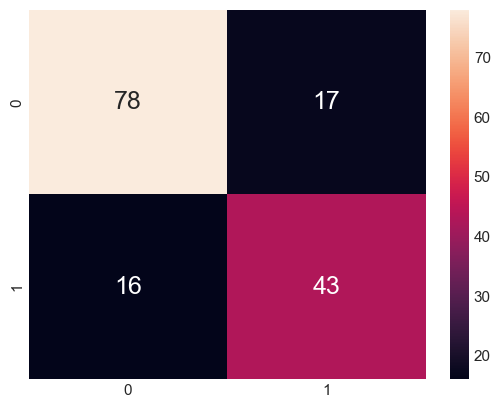

In [20]:
outcome_test_pred = dectree4.predict(desdataTest)
sb.heatmap(confusion_matrix(outcomeTest, outcome_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Test data: \t")
print("Classification Accuracy \t:", dectree4.score(desdataTest, outcomeTest))
TestInfo = confusion_matrix(outcomeTest, outcome_test_pred)
TN = TestInfo[0][0]
FN = TestInfo[1][0]
TP = TestInfo[1][1]
FP = TestInfo[0][1]

print("TN:",TN)
print("FN:",FN)
print("TP:",TP)
print("FP:",FP)
print("True Positive Rate: ", TP/(TP+FN)) #probability that an actual positive will test positive. 
print("False Positive Rate: ", FP/(TN+FP))
plt.show()

<!-- <div class="alert alert-warning">
    <strong>Based on the decision tree, we are able to conclude the glucose is the most important factor in diabetic outcome followed by age, BMI and blood pressure respectively.<br><br>The train data and test data has an accuracy of 0.8208 and 0.6818 respectively.
    </strong>

</div>-->
### Evaluating the decision tree
Based on the decision tree, we are able to conclude the glucose is the most important factor in diabetic outcome followed by age, BMI and blood pressure respectively.The train data and test data has an accuracy of 0.8208 and 0.6818 respectively. we believe that the accuracy is quite bad and therefore, we have decided to find ways to improve the accuracy

---
## Data Cleaning (Upsampling)

<!--<div class="alert alert-warning">
    <strong>In order to improve accuracy, we implemented an additional data cleaning step which is beyond our course using upsampling method.</strong>

</div> -->

In order to improve our model accuracy, we first look at our data. we realised that the dataset that we are using have more non-diabetic class compared to diabetic in our dataset.Therefore, to solve our class inbalance issue, we then use the scikit learn library that allows us to upsameple our data

In [21]:
#Upsampling

#set the minority class to a seperate dataframe
df_1 = data[data['Outcome'] == 1]
#set other classes to another dataframe
other_df = data[data['Outcome'] == 0] 

df_1_upsampled = resample(df_1,random_state=42,n_samples=1000,replace=True)
other_df_upsampled = resample(other_df,random_state=42,n_samples=1000,replace=True)

In [22]:
#Concat the upsampled dataframes together
c_upsampled_data = pd.concat([df_1_upsampled,other_df_upsampled])

#Shuffle rows
c_upsampled_data = c_upsampled_data.sample(frac=1)
c_upsampled_data = c_upsampled_data.reset_index()

#Drop Insulin and SkinThickness
c_upsampled_data = c_upsampled_data.drop(["Insulin", "SkinThickness", "index"], axis =1)

c_upsampled_data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,122.0,90.0,49.7,0.325,31,1
1,2,146.0,76.0,38.2,0.329,29,0
2,0,124.0,70.0,27.4,0.254,36,1
3,0,129.0,110.0,67.1,0.319,26,1
4,3,173.0,82.0,38.4,2.137,25,1


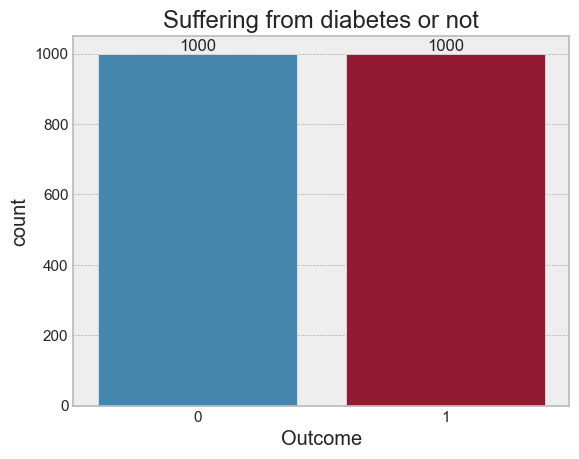

In [23]:
plt.style.use('bmh')
ax = sb.countplot(x= c_upsampled_data.Outcome , data= c_upsampled_data)
ax.bar_label(ax.containers[0])
ax.set_title('Suffering from diabetes or not')
plt.show()

In [24]:
X = pd.DataFrame(c_upsampled_data[["Glucose", "BloodPressure", "BMI", "Age"]])
y = pd.DataFrame(c_upsampled_data["Outcome"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=True)
X_train.head()

,Glucose,BloodPressure,BMI,Age
0,122.0,90.0,49.7,31
816,106.0,92.0,22.7,48
790,96.0,56.0,24.7,39
361,72.0,78.0,31.6,38
592,115.0,98.0,52.9,28


### After Upsampling
After upsampling the data, we can now see that both the diabetic and non-diabetic class have an equal number of data per class. After managing to upsample our dataset, we then proceed to remodel our decision tree again to see if there is any changes to the model accuracy using the clean dataset

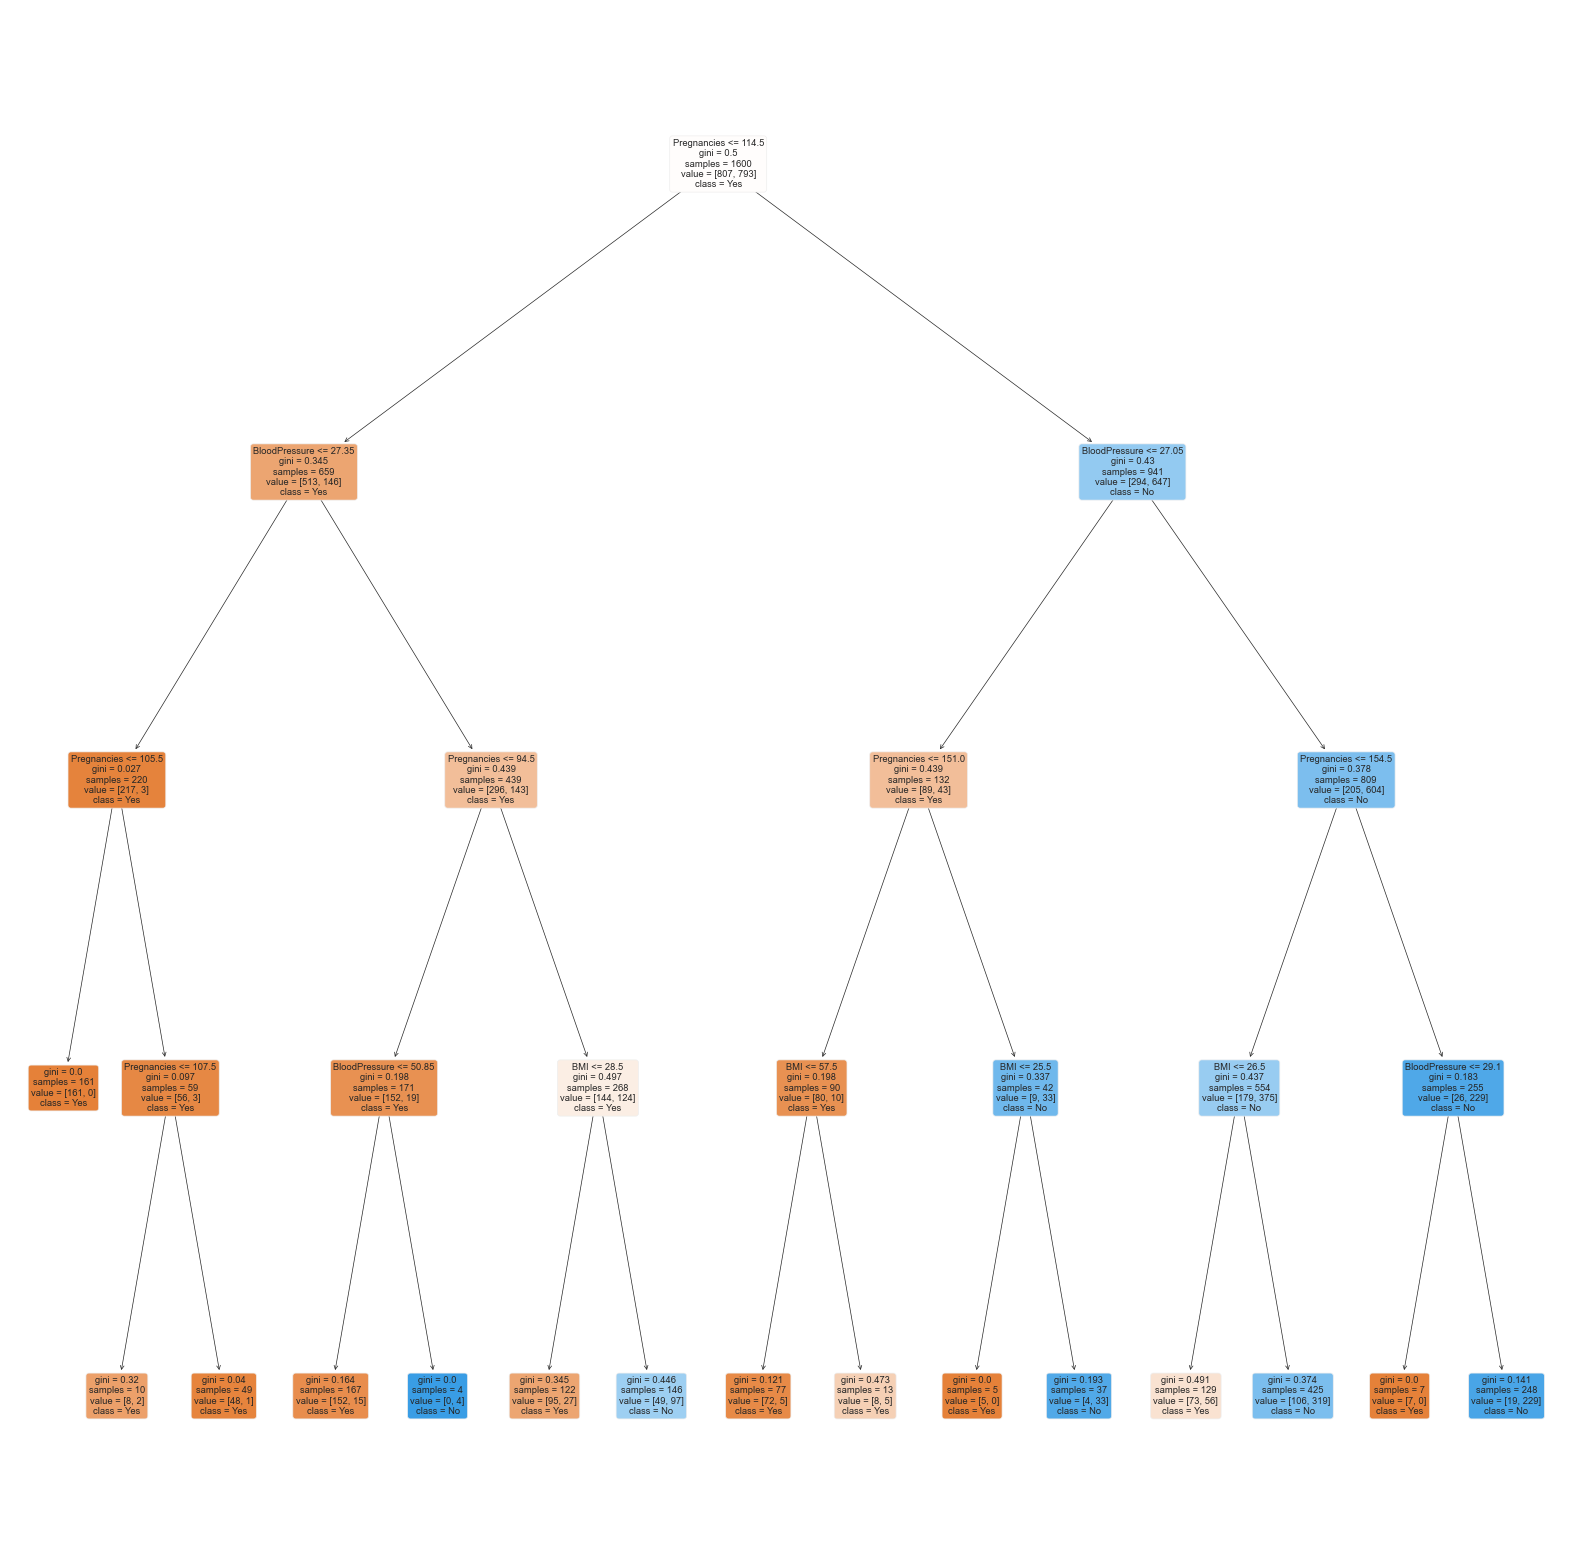

In [25]:
dectree5 = DecisionTreeClassifier(max_depth = 4)
dectree5.fit(X_train, y_train)

f = plt.figure(figsize=(20,20))
plot_tree(dectree5, filled=True, rounded=True, 
          feature_names=c_upsampled_data.columns, 
          class_names=["Yes","No"])
plt.show()

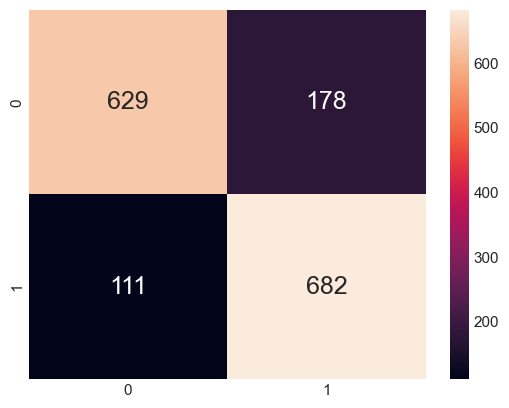

Train data: 	
Classification Accuracy 	: 0.819375
TN: 629
FN: 111
TP: 682
FP: 178
True Positive Rate:  0.8600252206809584
False Positive Rate:  0.22057001239157373


In [26]:
y_train_pred = dectree5.predict(X_train)
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

print("Train data: \t")
print("Classification Accuracy \t:", dectree5.score(X_train, y_train))
TrainInfo = confusion_matrix(y_train, y_train_pred)
TN = TrainInfo[0][0]
FN = TrainInfo[1][0]
TP = TrainInfo[1][1]
FP = TrainInfo[0][1]

print("TN:",TN)
print("FN:",FN)
print("TP:",TP)
print("FP:",FP)
print("True Positive Rate: ", TP/(TP+FN)) #probability that an actual positive will test positive. 
print("False Positive Rate: ", FP/(TN+FP)) 

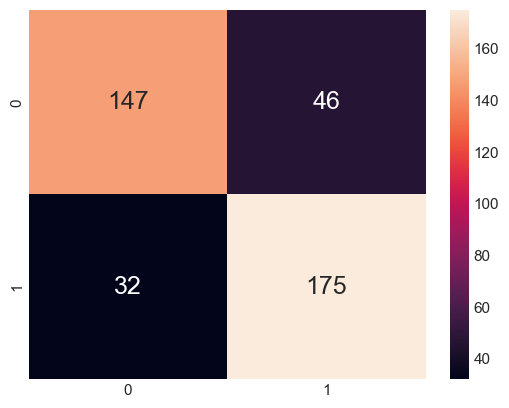

Test data: 	
Classification Accuracy 	: 0.805
TN: 147
FN: 32
TP: 175
FP: 46
True Positive Rate:  0.8454106280193237
False Positive Rate:  0.15458937198067632


In [27]:
y_test_pred = dectree5.predict(X_test)
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

# Print the Classification Accuracy
print("Test data: \t")
print("Classification Accuracy \t:", dectree5.score(X_test, y_test))
TestInfo = confusion_matrix(y_test, y_test_pred)
TN = TestInfo[0][0]
FN = TestInfo[1][0]
TP = TestInfo[1][1]
FP = TestInfo[0][1]

print("TN:",TN)
print("FN:",FN)
print("TP:",TP)
print("FP:",FP)
print("True Positive Rate: ", TP/(TP+FN)) #probability that an actual positive will test positive. 
print("False Positive Rate: ", FN/(FN+TP)) 

### Evaluating the model with the clean dataset
After modeling we then compare the accuracy of our current model which we have just created using the clean dataset. We manage to increase the accuracy of the model from having an accuracy of 0.75 to an accuracy of 0.79.</br>

Therefore, we can conclude that by having a cleaned dataset with balanced class, we can improved our model accuracy. However we are still not satisfied with the result as the false Negative rate is still quite high with value of 0.21 (1 - 0.79). We are not satisfied with this as this means there is still a high chance that a person with diabetes might be classified wrongly.

thus we proceed to find other ways to improve on the model accuracy. We will be using the cleaned dataset from here onwards.

---
## Additional Prediction Methods

<div class="alert alert-warning">
    <strong>In order to improve accuracy, we seek for other predicting methods and made a comparison.</strong>

</div>

### Random Forest Tree

<!--<div class="alert alert-warning">
    <strong>In a random forest classification, multiple decision trees are created using different random subsets of the data and features<br><br>
        Predictions are made by calculating the prediction for each decision tree, then taking the most popular result.
    </strong>

</div>-->

In a random forest classification, multiple decision trees are created using different random subsets of the data and features</br>

Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. </br>

Random Forest combines several decision trees for classification and regression. It prevents overfitting due to bias and is more accurate in predictions. </br>

With the listed benefits, we believe that random forest might give us a good results and thus we proceed on with creating the model using our cleaned data.

Best hyperparameters: {'max_depth': 17, 'n_estimators': 82}
Accuracy: 
0.9675


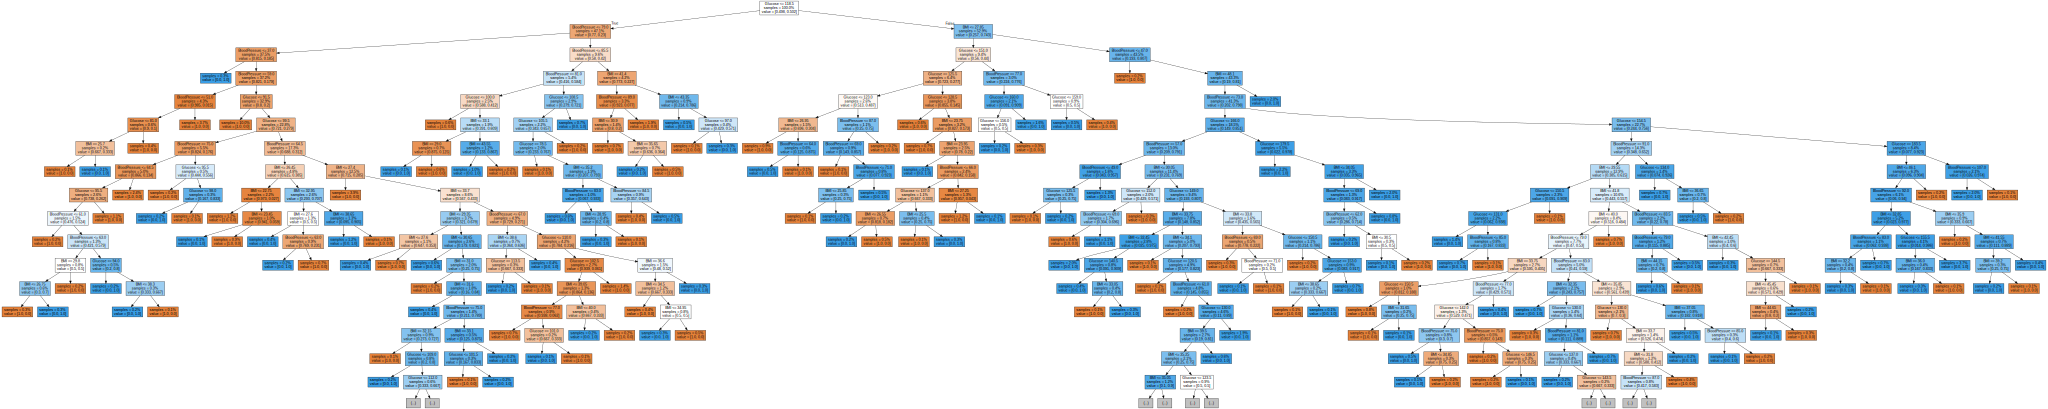

'Source.gv.png'

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

data = c_upsampled_data

treedataDF = pd.DataFrame(data[["Glucose", "BloodPressure", "BMI"]])
outcomeDF = pd.DataFrame(data["Outcome"])

#Code for testing accuracy if need.
# for i in range(0,20):
#     treedataTrain, treedataTest, outcomeTrain, outcomeTest = train_test_split(treedataDF, outcomeDF, test_size = 0.20)
#     rf = RandomForestClassifier()
#     rf.fit(treedataTrain, outcomeTrain.values.ravel())
#     y_pred = rf.predict(treedataTest)
#     accuracy = accuracy_score(outcomeTest, y_pred)
#     print("Accuracy:", accuracy)

treedataTrain, treedataTest, outcomeTrain, outcomeTest = train_test_split(treedataDF, outcomeDF, test_size = 0.20)
rf = RandomForestClassifier()
rf.fit(treedataTrain, outcomeTrain.values.ravel())

#Hyperparameter Tuning
param_dist = {'n_estimators': randint(1,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(treedataTrain, outcomeTrain.values.ravel())

best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

#Random Forest:
y_pred = rf.predict(treedataTest)
accuracy = accuracy_score(outcomeTest, y_pred)
print("Accuracy: ")
print(accuracy)

tree = rf.estimators_[50]

#f = plt.figure(figsize=(60,40))
#plot_tree(tree, filled=True, rounded=True, 
#          feature_names=c_upsampled_data.columns, 
#          class_names=["Yes","No"])
#plt.show()
#plt.figure(figsize=(20,8))

dot_data = export_graphviz(tree,
                                feature_names=treedataTrain.columns,  
                                filled=True,  
                                max_depth=16, 
                                impurity=False, 
                                proportion=True)
graph = graphviz.Source(dot_data, format='png')
display(graph)
graph.render()


<!--<div class="alert alert-warning">
    <strong>Random forest tree would be the best classifier to determine whether a person is likely to have diabetes with an accuracy of 0.97 compared to decision tree.
    </strong>

</div>-->

### Parameters that we have selected
We have created the random forest by using the scikit learn library function called RandomForestClassifier.

By tuning the hyperparameters, we estimated that the optimal depth would be 14. So we used depth 5 and 14 to produce our Random Forest.

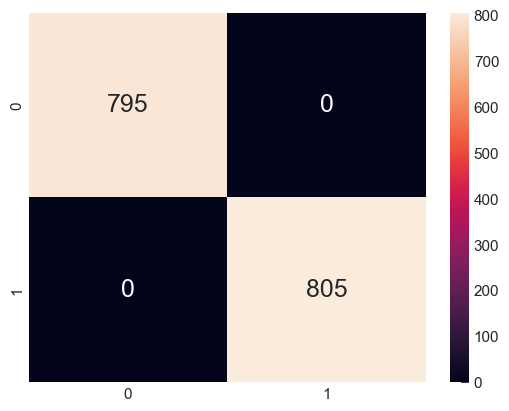

Train data: 	
Classification Accuracy 	: 1.0
TN: 795
FN: 0
TP: 805
FP: 0
True Positive Rate:  1.0
False Positive Rate:  0.0


In [33]:
y_train_pred = rf.predict(treedataTrain)
sb.heatmap(confusion_matrix(outcomeTrain, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

print("Train data: \t")
print("Classification Accuracy \t:", rf.score(treedataTrain, outcomeTrain))
TrainInfo = confusion_matrix(outcomeTrain, y_train_pred)
TN = TrainInfo[0][0]
FN = TrainInfo[1][0]
TP = TrainInfo[1][1]
FP = TrainInfo[0][1]

print("TN:",TN)
print("FN:",FN)
print("TP:",TP)
print("FP:",FP)
print("True Positive Rate: ", TP/(TP+FN)) #probability that an actual positive will test positive. 
print("False Positive Rate: ", FP/(TN+FP)) 

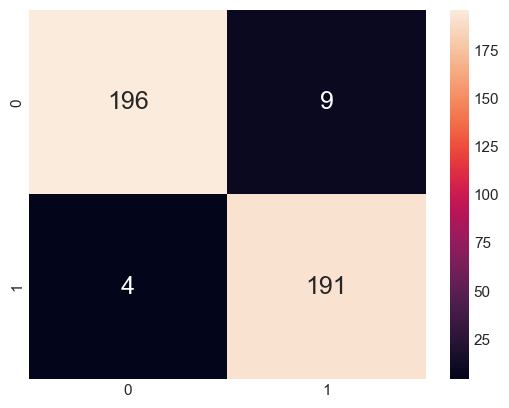

test data: 	
Classification Accuracy 	: 0.9675
TN: 196
FN: 4
TP: 191
FP: 9
True Positive Rate:  0.9794871794871794
False Positive Rate:  0.04390243902439024


In [34]:
y_test_pred = rf.predict(treedataTest)
sb.heatmap(confusion_matrix(outcomeTest, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

print("test data: \t")
print("Classification Accuracy \t:", rf.score(treedataTest, outcomeTest))
TrainInfo2 = confusion_matrix(outcomeTest, y_test_pred)
TN = TrainInfo2[0][0]
FN = TrainInfo2[1][0]
TP = TrainInfo2[1][1]
FP = TrainInfo2[0][1]

print("TN:",TN)
print("FN:",FN)
print("TP:",TP)
print("FP:",FP)
print("True Positive Rate: ", TP/(TP+FN)) #probability that an actual positive will test positive. 
print("False Positive Rate: ", FP/(TN+FP)) 

### Evaluating the model
After training the model, we then evaluate the models accuracy using the train and test dataset that we Have split before the training. By looking at the outcome of the model, we can conclude that the model that we have created is quite accurate as the accuracy of the model is 0.96 with a very low false negative rate of 0.02 (1 - 0.98). This can lower the chances of misclassifying a person with diabetes.

-----
## K Nearest Neighbour Algorithm

KNN networks are one of the more commonly used machine learning algorithms. Is is a supervised learning algorithm and can be used to solved both classification and regression problems. For our case, we will be using it to create a classification model to detect if the a person have diabetes or not

### Scaling the Data
First we will scale the data. We have to scale the data for our KNN algorithm as KNN use distance in the models algorithm.By scaling we can ensure that the range of the variables which we are using have the same range overall. </br>

For our data, we can see from our visualisation, we can clearly see a difference between the variables distribution. By having different range, it can make our models more inaccurate as the KNN algorithm will give a higher weightage to variable with a higher magnitude.

In [35]:
from sklearn.preprocessing import StandardScaler
############################# Scaling ###################################
Knndata = c_upsampled_data

scaledX = StandardScaler()
X = pd.DataFrame(scaledX.fit_transform(Knndata.drop(["Outcome"], axis = 1),),columns=['Pregnancies', 'Glucose', 'BloodPressure',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
Y = Knndata.Outcome

In [36]:
knn_x_train,knn_x_test,knn_y_train,knn_y_test = train_test_split(X,Y,test_size=1/3,random_state=42, stratify=y)

#### How we scaled the data
To scale our data, we use the scikitlearn libray function called standardScaler to scale the data. After scaling the data, we then move on to create the model using the ScikitLearn model called KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier


knn_test_scores = []
knn_train_scores = []

for i in range(1,15):
    knn_model = KNeighborsClassifier(i)
    knn_model.fit(knn_x_train,knn_y_train)
    
    knn_train_scores.append(knn_model.score(knn_x_train,knn_y_train))
    knn_test_scores.append(knn_model.score(knn_x_test,knn_y_test))

C:\Users\65936\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\65936\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\65936\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\65936\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [38]:
max_train_score = max(knn_train_scores)
train_scores_ind = [i for i, v in enumerate(knn_train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [39]:
max_test_score = max(knn_test_scores)
test_scores_ind = [i for i, v in enumerate(knn_test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 92.95352323838081 % and k = [1]


C:\Users\65936\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\65936\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


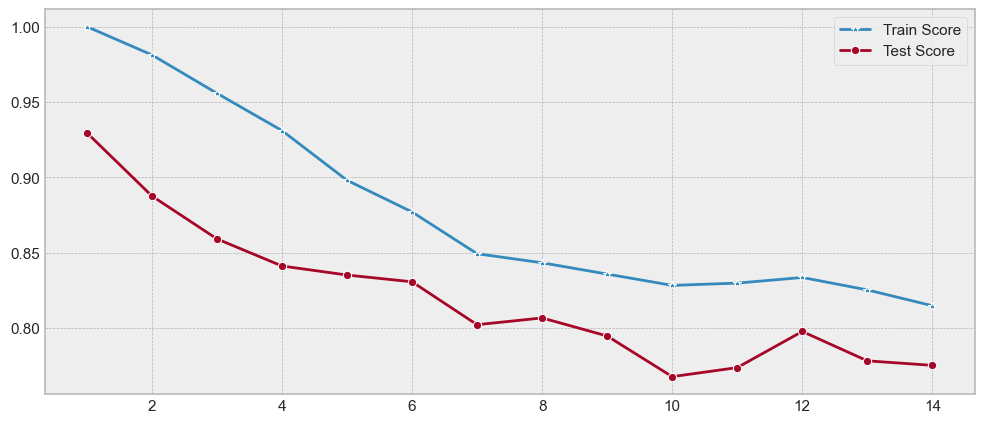

In [40]:
plt.figure(figsize=(12,5))
p = sb.lineplot(range(1,15),knn_train_scores,marker='*',label='Train Score')
p = sb.lineplot(range(1,15),knn_test_scores,marker='o',label='Test Score')

-----
### Finding the K value which we will be using
After running the KNN algorithm for 15 times to find the best K value which represents the number of the nearest neighbours, we found that using our data, a count value of 1 would provide us with the best accuracy. therefore, we have selected our K value = 1. However after some research, we found out that with a k=1 value, our model might be more suseptible to differences in dataset and thus it might not be good to use it as a model to predict whether a person have diabetes in the real world

----

In [41]:
knn_model = KNeighborsClassifier(1)

knn_model.fit(knn_x_train,knn_y_train)
knn_model.score(knn_x_test,knn_y_test)

C:\Users\65936\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9295352323838081

C:\Users\65936\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


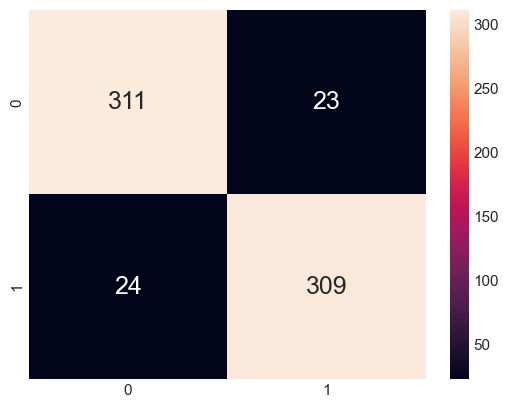

Test data: 	
Classification Accuracy 	: 0.9295352323838081
TN: 311
FN: 24
TP: 309
FP: 23
True Positive Rate:  0.9279279279279279
False Positive Rate:  0.07207207207207207


C:\Users\65936\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
knn_pred = knn_model.predict(knn_x_test)
sb.heatmap(confusion_matrix(knn_y_test, knn_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

# Print the Classification Accuracy
print("Test data: \t")
print("Classification Accuracy \t:", knn_model.score(knn_x_test, knn_y_test))
TestInfo = confusion_matrix(knn_y_test, knn_pred)
TN = TestInfo[0][0]
FN = TestInfo[1][0]
TP = TestInfo[1][1]
FP = TestInfo[0][1]

print("TN:",TN)
print("FN:",FN)
print("TP:",TP)
print("FP:",FP)
print("True Positive Rate: ", TP/(TP+FN)) #probability that an actual positive will test positive. 
print("False Positive Rate: ", FN/(FN+TP))

### Analysing the KNN model that we have created
After going through finalizing the K value which we used which is K = 1, we then created the model using the value and plot out the accuracy using the dataset we have split previously. We manage to get a test accuracy of 0.946, with a true positive rate of 0.951. We believe that by getting such values, we can say our model that we have created using the KNN algorithm is quite good. </br>

However, We also have to take note of the K value which we have choosen as our K value is 1. This means that we need to take into account that the model we have created is more suceptible to noise when we are deciding on our final model which we want to go with.

---
## Conclusion for modeling
After looking through the models that we have created, we can see that random forest and KNN can provide us with quite good model accuracy and thus we have to select either of the models. </br>

However, we have decided to go with random forest as it provides us with the best accuracy most of the time and also that selecting the KNN model might be bad as the K value that we have selected might result in the model that we have created being inaccurate